# Subplots: a deeper dive

There's an elephant in the room and it's the command we've used most in this course so far: `fig, ax = plt.subplots(n,m)`. What does this *actually* do? This command creates a figure and places one or more Axes objects on the figure. We can actually do this in two steps instead:

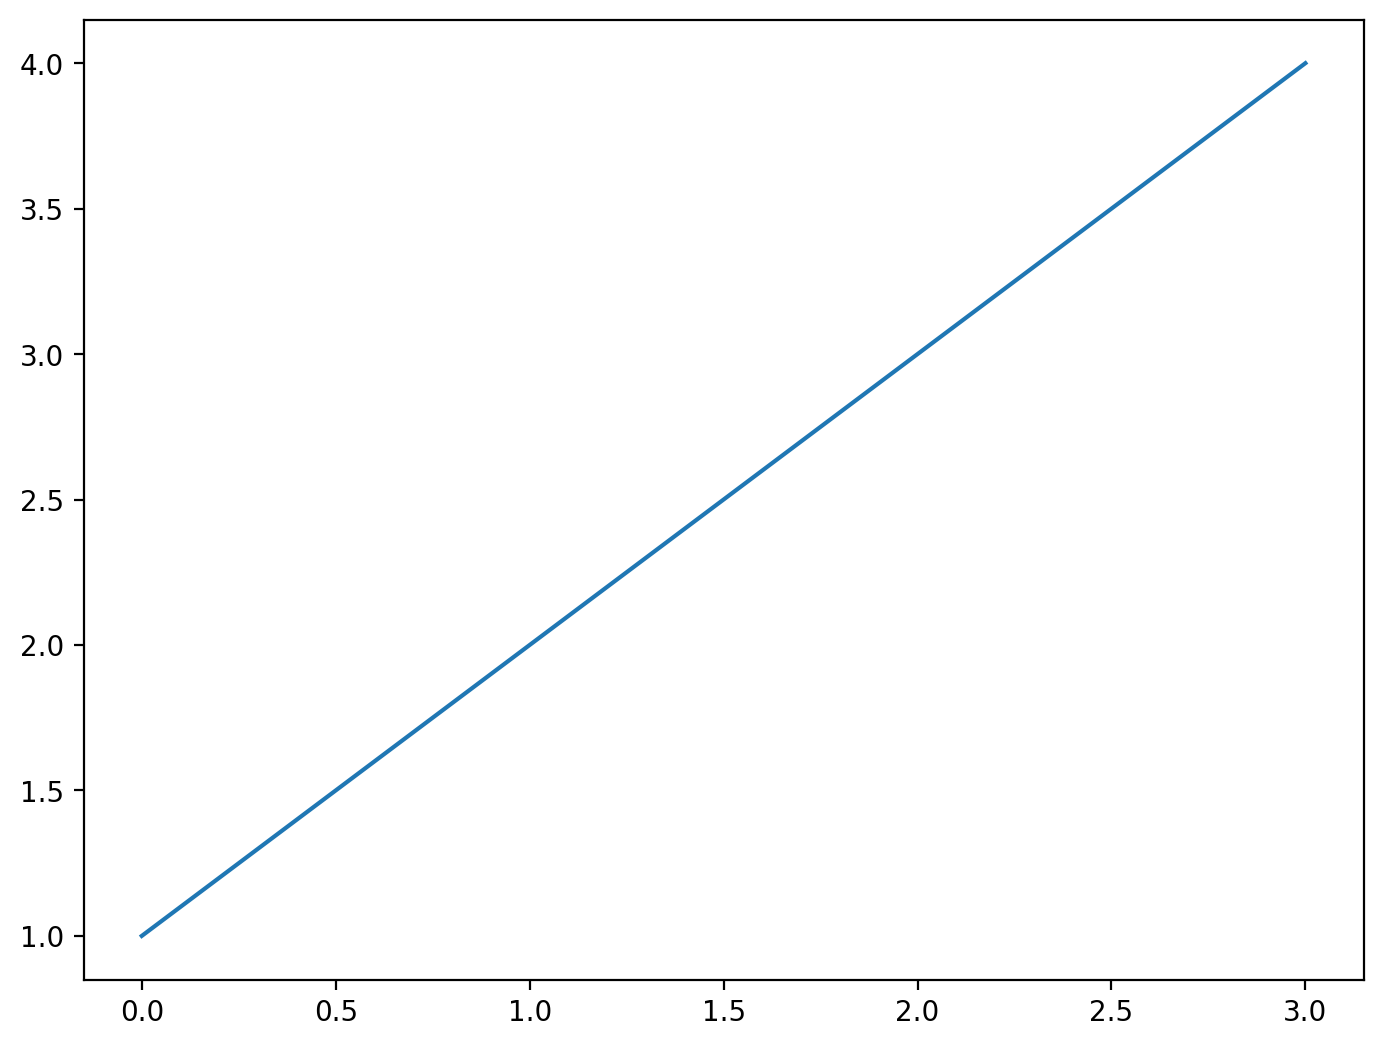

In [24]:
% config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()  # Creates a figure (no Axes objects will be present yet)
ax = fig.add_axes(
    [0, 0, 1, 1]
)  # Adds an Axes object to the figure with the extent of the Axes defined by [left, bottom, width, height]

x = [0, 1, 2, 3]
y = [1, 2, 3, 4]
ax.plot(x, y)

The command `ax = fig.add_axes([0,0,1,1])` adds an Axes object to the figure with the extent of the Axes defined by [left, bottom, width, height] where the figure extent is normalized to go from (0,0) (bottom left) to (1,1) (top right). We can add multiple axes to our figure in this way and plot on them as we've been doing:

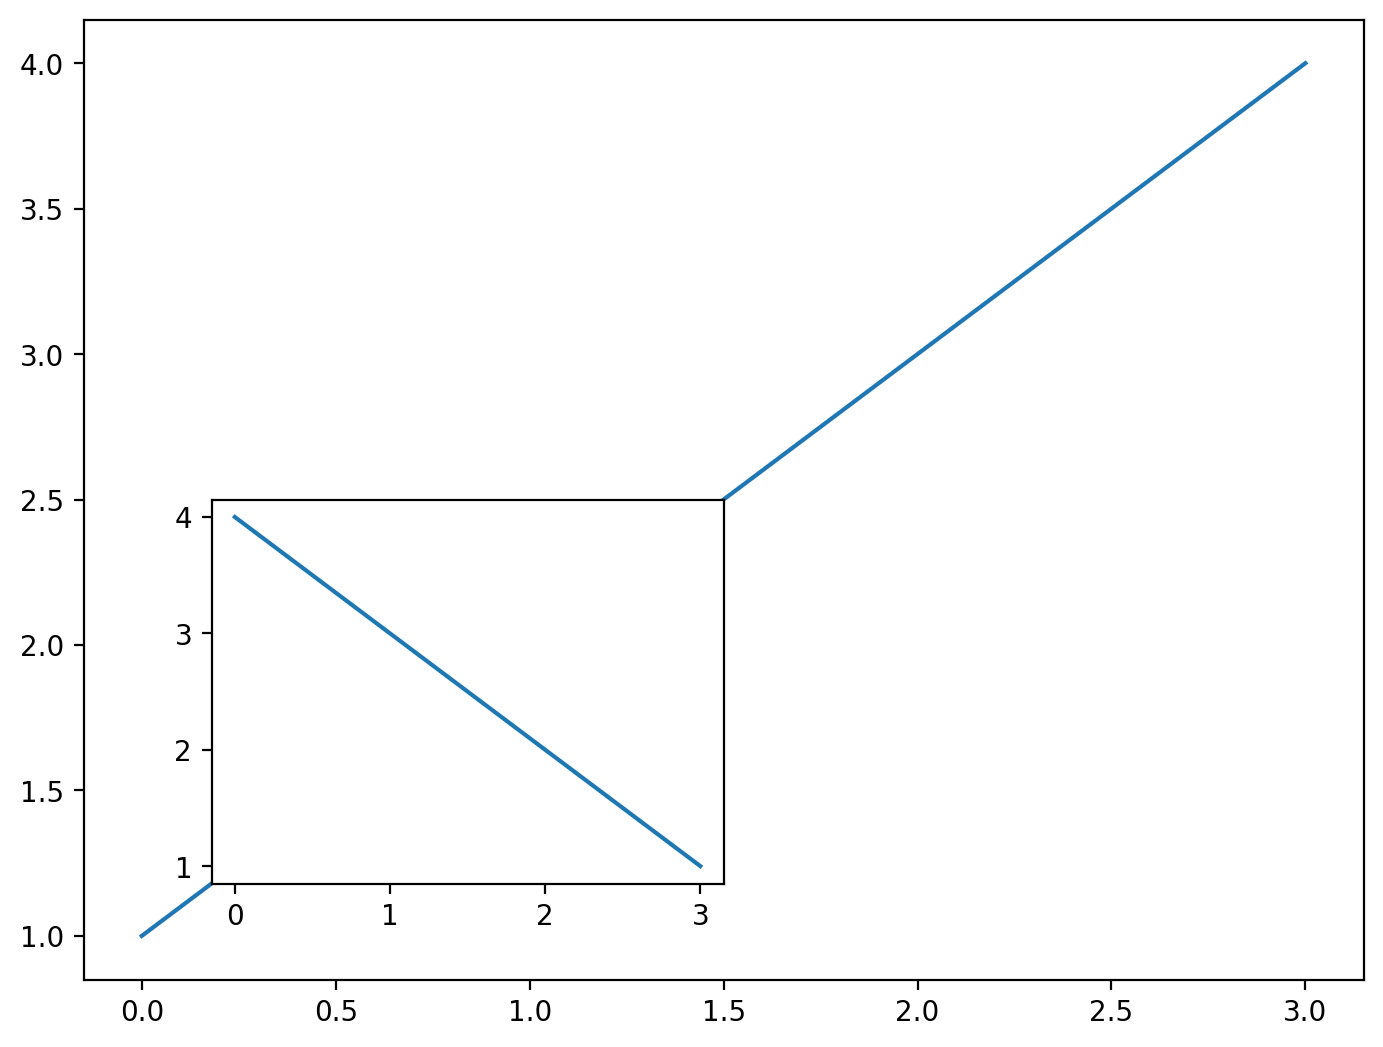

In [25]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax_small = fig.add_axes([0.1, 0.1, 0.4, 0.4])  # left, bottom, width, height

x = [0, 1, 2, 3]
y = [1, 2, 3, 4]
y2 = [4, 3, 2, 1]
ax.plot(x, y)
ax_small.plot(x, y2)

We can create our own custom subplots in this way. Consider this example where we break the figure into four quadrants. We need to specify the bottom-left corner of each axes we want to add and its width and height. We'll follow this pattern for it:

![Manual subplots](img/5.1-subplots.png)

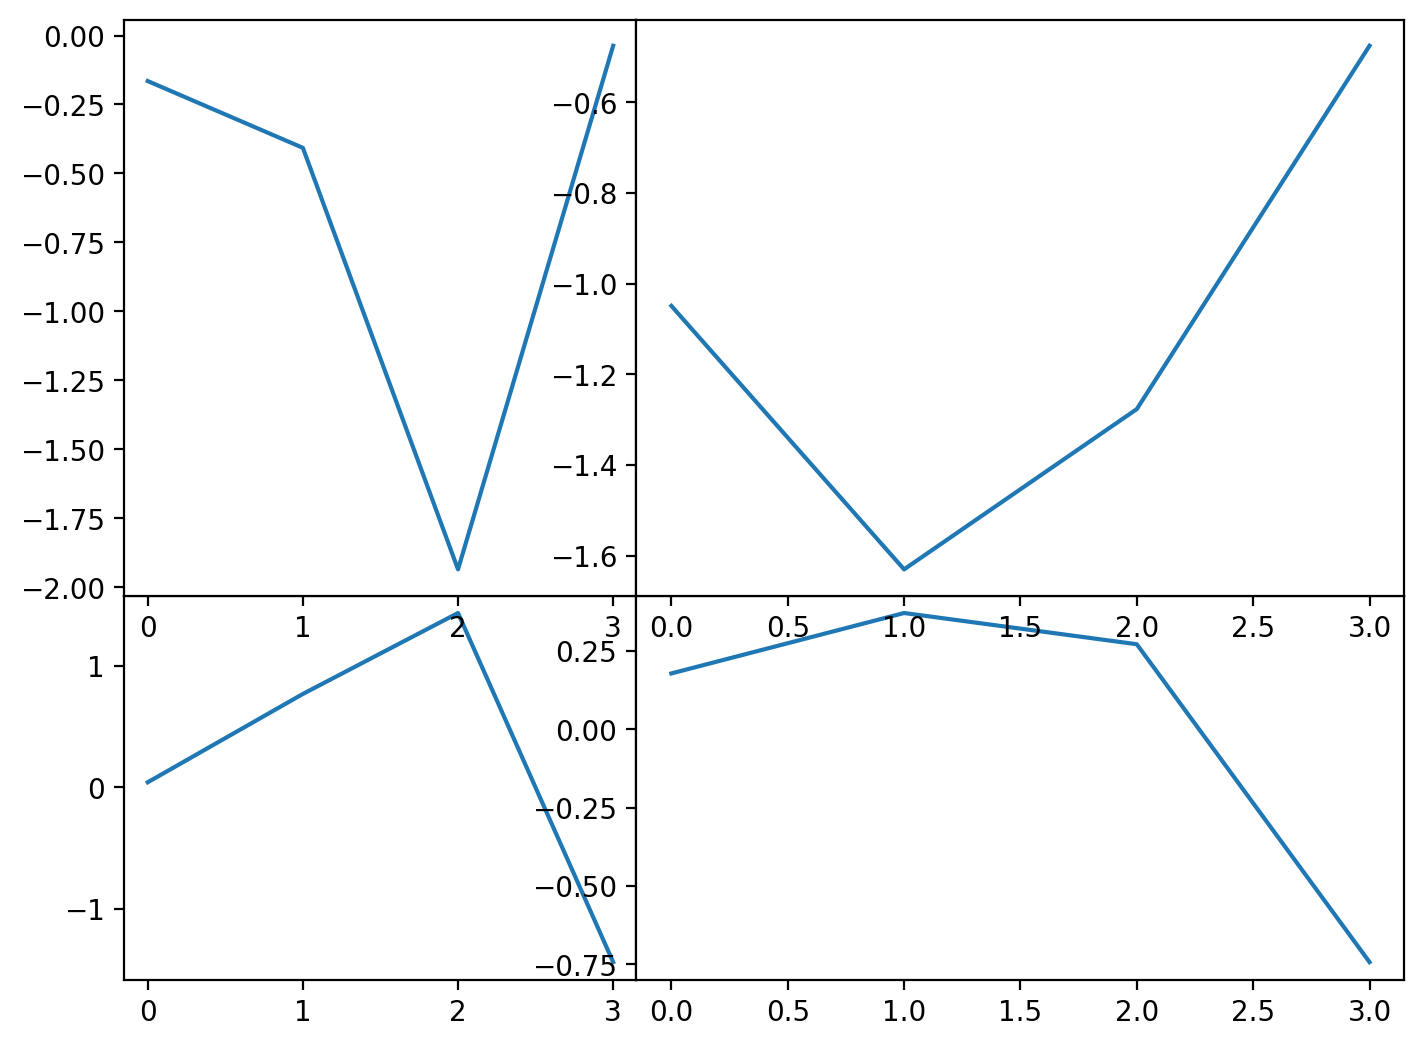

In [26]:
fig = plt.figure()
axs = [[], [], [], []]
axs[0] = fig.add_axes([0.0, 0.0, 0.4, 0.4])  # left, bottom, width, height
axs[1] = fig.add_axes([0.0, 0.4, 0.4, 0.6])
axs[2] = fig.add_axes([0.4, 0.0, 0.6, 0.4])
axs[3] = fig.add_axes([0.4, 0.4, 0.6, 0.6])

np.random.seed(235)
x = [0, 1, 2, 3]
for ax in axs:
    y = np.random.randn(4)
    ax.plot(x, y)

We can accomplish a similar arrangement with the subplots command as we saw previously, except that space is added to accommodate the axes labels:

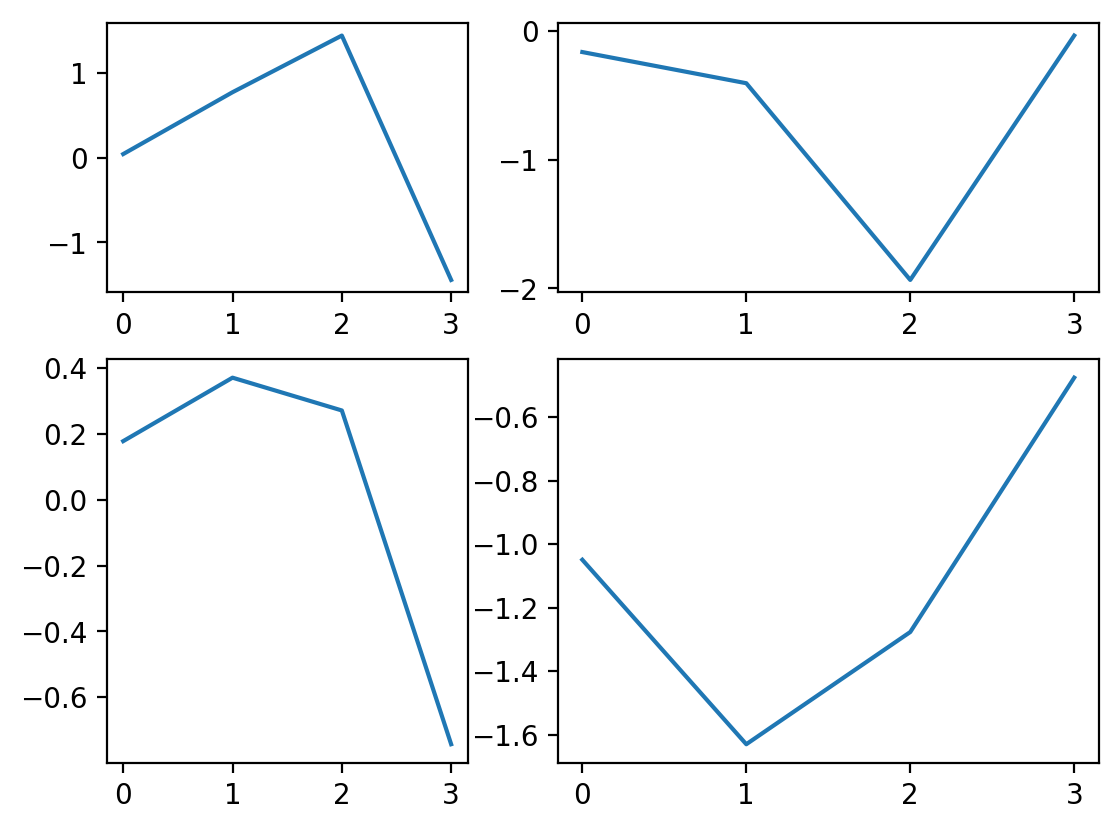

In [28]:
fig, axs = plt.subplots(2, 2, width_ratios=[0.4, 0.6], height_ratios=[0.4, 0.6])

One additional feature of `subplots()` is that you can set the axes to be shared of, for example, the y axes were the same across the two top figures and also across the two bottom figures. To do this, we use the `sharey` keyword argument and tell it to share across rows.

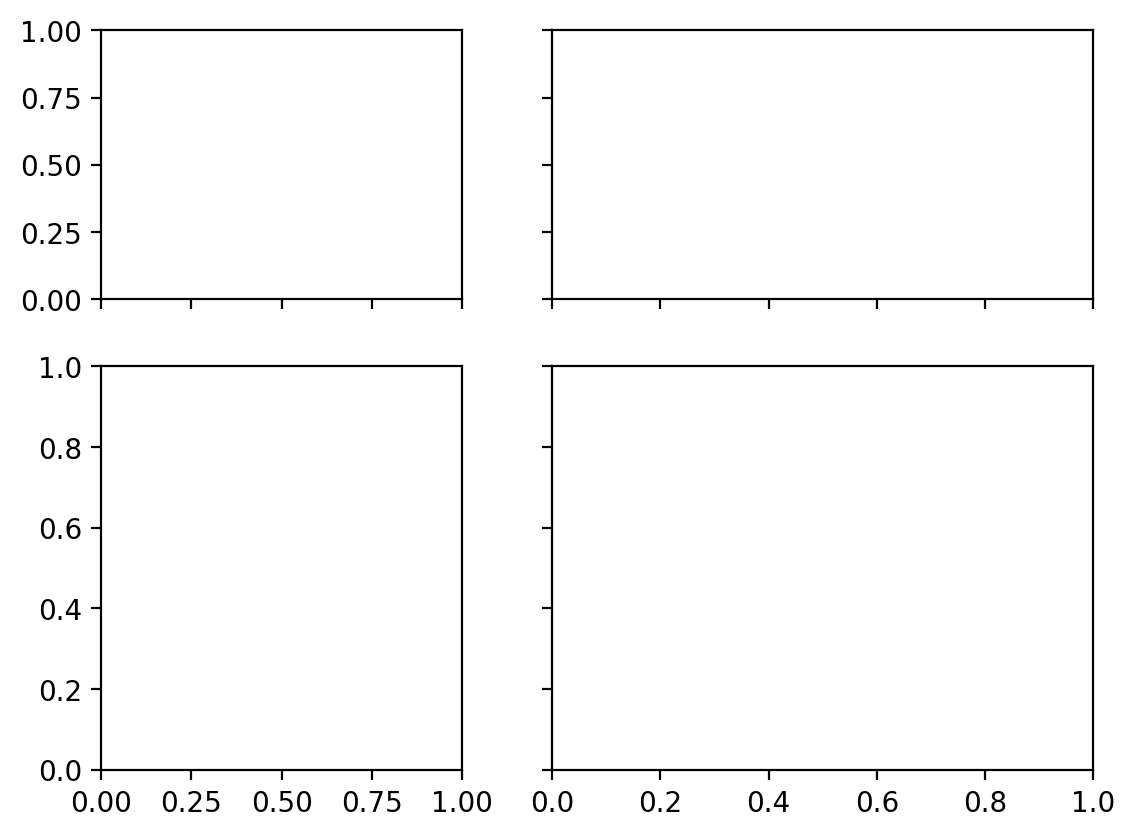

In [ ]:
fig, axs = plt.subplots(
    2, 2, width_ratios=[0.4, 0.6], height_ratios=[0.4, 0.6], sharey="row", sharex="col"
)

This sharing of axes is also a convenience of sorts instead of having to call `ax.sharex()` and `ax.sharey()` to set those manually. For example, we can do this with our previous example where we manually created the axes as follows

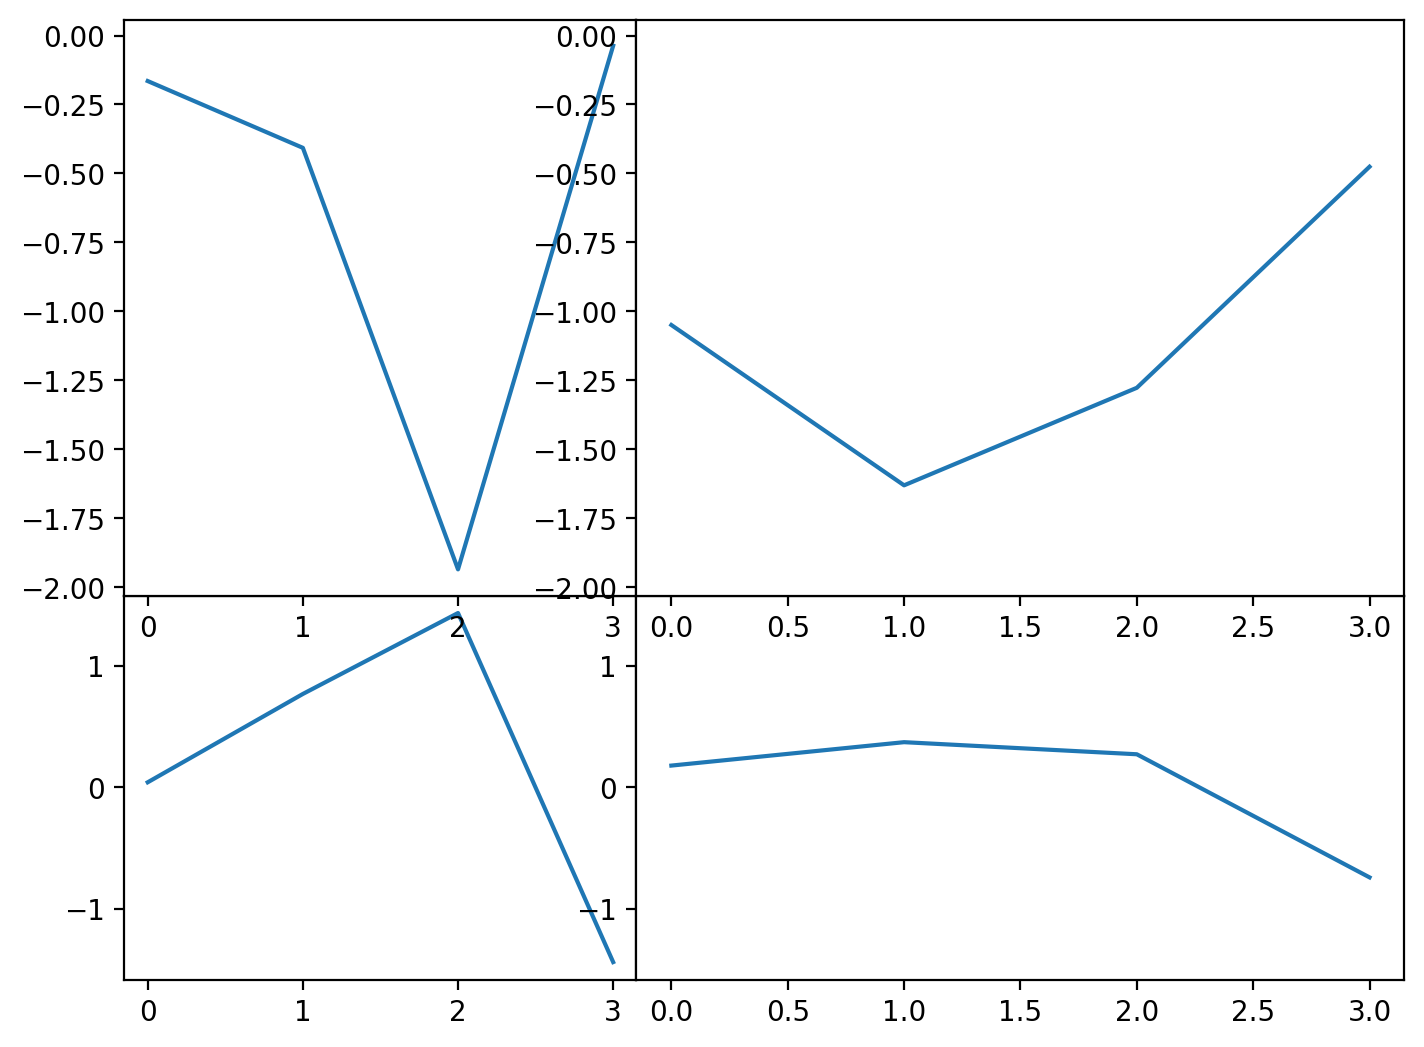

In [ ]:
fig = plt.figure()
axs = [[], [], [], []]
axs[0] = fig.add_axes([0.0, 0.0, 0.4, 0.4])  # left, bottom, width, height
axs[1] = fig.add_axes([0.0, 0.4, 0.4, 0.6])
axs[2] = fig.add_axes([0.4, 0.0, 0.6, 0.4])
axs[3] = fig.add_axes([0.4, 0.4, 0.6, 0.6])

axs[0].sharex(axs[1])
axs[2].sharex(axs[3])
axs[0].sharey(axs[2])
axs[1].sharey(axs[3])

np.random.seed(235)
x = [0, 1, 2, 3]
for ax in axs:
    y = np.random.randn(4)
    ax.plot(x, y)

We can see that the axes are now shared here, just as in the previous example with `subplots()`. You'll find there will likely be multiple ways to accomplish your plotting goal and often you'll want to pick the simplest approach that achieves the data visualization that you want.

This is one example of many where matplotlib gives you the ability to create custom arrangements of axes while also simultaneously providing some convenience functions like `subplots()` for simplifying that process. The more you dive into matplotlib, the more you'll be able to customize plots to meet your needs, but the basic commands are always available for more everyday plotting needs.